# <center>MACHINE LEARNING <br> <br> Problem Session 8 <br> Logistic Regression and SoftMax</center>

## Exercise 2

e) Generate a gradient descend algorithm with ridge regularisation. To do so, you only have to add to the gradient an extra term $+\lambda w$, where $\lambda$ is the regularisation parameter. Plot the data points and the resulting linear classifier in the same figure.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(X,w):
    # sigmoid: Computes the sigmoid function
    #     X : NxD design matrix
    return 1/(1+np.exp(-np.dot(w,X.T)))

def computeError(X,y,w):
    # computeCost : average sum of squares error. Expects
    #     X : NxD design matrix
    #     t : Nx1 target response variable
    #     theta : model parameters
    N = len(y)
    h=sigmoid(X,w) #sigmoid function
    aux =  y*np.log(h)+(1-y)*np.log(1-h)
    return np.sum( aux**2 , axis = 0 ) / 2


def gradientDescent_Logistic_Ridge(X, y, w, alpha, reg, maxIts,tol):
    # gradientDescent expects 
    #     X : matrix of shape NxD
    #     y : vector of shape Nx1
    #     alpha : learning rate
    #     reg :  lambda, regularisation parameter
    #     maxIts : max number of iterations
    #     tol : absolute tolerance error

    w_vec = np.zeros([len(w),maxIts])
    error_vec = np.zeros([maxIts])
    N = len(y) # number of training examples
    
    for it in range(maxIts):
        # error for current parameters theta : w^T * X - y
        error = computeError(X,y,w)
        
        # gradient : X^T * error
        grad = np.dot((sigmoid(X,w)-Y),X)
        
        # update : w = w - alpha/N * grad - alpha * reg * w
        w = w - alpha * grad - alpha * reg * w
        
        # save current it params and error
        w_vec[:,it] = np.reshape(w,(len(w),))
        error_vec[it] = computeError(X, y, w)
        
        # check convergence
        if it > 0 and abs( error_vec[it] - error_vec[it-1] ) < tol:
            return w_vec[:,:it+1], error_vec[:it+1]
        

    return w_vec, error_vec


def plotModel(w,X,Y):
    x_min=np.min(X[:,1])
    x_max=np.max(X[:,1])
    
    x = np.linspace(x_min,x_max,100)

    m=-w[1]/w[2]
    n=-w[0]/w[2]
    y = m*x+n
    plt.plot(x, y)
    plt.scatter(X[:,1],X[:,2],c=Y)
    plt.show()

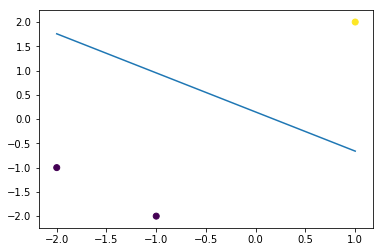

In [ ]:
X=np.array([[1.,1.,2.], [1.,-1.,-2.], [1.,-2.,-1.]])    
Y=np.array([1,0,0])
w=np.array([0.,0.,0.])

alpha=0.1
reg=0.1
w_vec,error_vec=gradientDescent_Logistic_Ridge(X,Y,w,alpha,reg,100,0.0000000001)
w=w_vec[:,-1]

plotModel(w,X,Y)

 f) (optional) Estimate the logistic classifier using the function https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html}{sklearn.linear\_model.LogisticRegression. Draw the data points and the resulting linear classifier in the same figure.

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


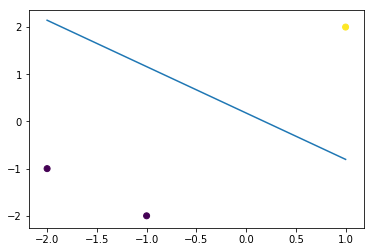

In [ ]:
from sklearn.linear_model import LogisticRegression
X=np.array([[1.,1.,2.], [1.,-1.,-2.], [1.,-2.,-1.]])    
Y=np.array([1,0,0])

LR=LogisticRegression().fit(X.T,Y)
w=LR.coef_[0]

plotModel(w,X,Y)

## Exercise 4

a) We will fit the model $p(y=1 | \mathbf{x}, \mathbf{w})=\sigma(w_0 +w_1 x_1 +w_2 x_2)$ by minimizing the Cross-Entropy error $ \mathbb{E}(\mathbf{w})$.  For the solution you have obtained, How many points are wrong classified?

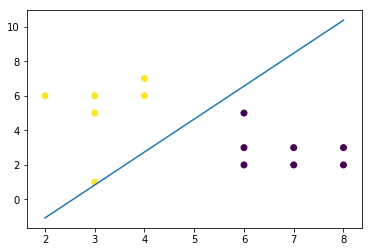

In [ ]:
X=np.array([[1.,2.,6.], [1.,3.,6.], [1.,4.,6.],[1,4,7],[1,3,5],[1,3,1],[1,6,2],[1,6,3],[1,6,5],[1,7,2],[1,7,3],[1,8,2],[1,8,3]])
Y=np.array([1,1,1,1,1,1,0,0,0,0,0,0,0])
w=np.array([0.,0.,0.])

alpha=0.1
reg=0.1
w_vec,error_vec=gradientDescent_Logistic_Ridge(X,Y,w,alpha,reg,1000,0.0001)
w=w_vec[:,-1]

plotModel(w,X,Y)

b) Now suppose we regularize only the $w_{0}$ parameter, i.e, we minimize $\mathbb{E}_T(\mathbf{w})=\mathbb{E}(\mathbf{w})+ \lambda w_{0}^{2}$.
            
  Use the Gradient Descent to estimate the classifier. Comment the results.

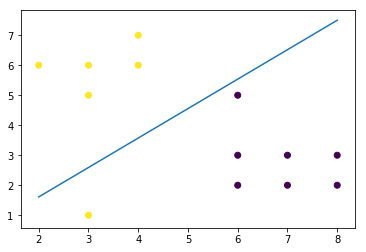

In [ ]:
#We copy the same function and only change the regularization part:

def gradientDescent_Logistic_w0Reg(X, y, w, alpha, reg, maxIts,tol):
    # gradientDescent expects 
    #     X : matrix of shape NxD
    #     y : vector of shape Nx1
    #     alpha : learning rate
    #     reg :  lambda, regularisation parameter
    #     maxIts : max number of iterations
    #     tol : absolute tolerance error

    w_vec = np.zeros([len(w),maxIts])
    error_vec = np.zeros([maxIts])
    N = len(y) # number of training examples
    
    for it in range(maxIts):
        # error for current parameters theta : w^T * X - y
        error = computeError(X,y,w)
        
        # gradient : X^T * error
        grad = np.dot((sigmoid(X,w)-Y),X)
        
        # update : w = w - alpha/N * grad - alpha * reg * w
        w = w - (alpha/N) * grad - alpha*reg*np.array([w[0],0,0])
        
        # save current it params and error
        w_vec[:,it] = np.reshape(w,(len(w),))
        error_vec[it] = computeError(X, y, w)
        
        # check convergence
        if it > 0 and abs( error_vec[it] - error_vec[it-1] ) < tol:
            return w_vec[:,:it+1], error_vec[:it+1]
        

    return w_vec, error_vec

X=np.array([[1.,2.,6.], [1.,3.,6.], [1.,4.,6.],[1,4,7],[1,3,5],[1,3,1],[1,6,2],[1,6,3],[1,6,5],[1,7,2],[1,7,3],[1,8,2],[1,8,3]])
Y=np.array([1,1,1,1,1,1,0,0,0,0,0,0,0])
w=np.array([0.,0.,0.])

alpha=0.1
reg=0.1
w_vec,error_vec=gradientDescent_Logistic_w0Reg(X,Y,w,alpha,reg,1000,0.0001)
w=w_vec[:,-1]

plotModel(w,X,Y)
